Computaton of group delay resulted from gain control as in Berry's model
by using a wave packet

adpated from:

https://dspillustrations.com/pages/posts/misc/group-delay-and-phase-delay-example.html


Sept 13, 2021 Created by CKC

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


In [123]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from NGD_TK_AS import NGD2L_TK_AS

In [124]:
from scipy.fftpack import fft, fftfreq
def FFT_quick(data, dt, center_data = False, center_faxis = True):
    if center_data:
        xft=fft(data-np.mean(data))
    else:
        xft=fft(data)
    xft_nor=xft/len(xft)
    freq=fftfreq(len(data), d=dt)

    if center_faxis:
        xft_nor = np.append( xft_nor[np.argmin(freq):], xft_nor[:np.argmin(freq)] )
        freq = np.append( freq[np.argmin(freq):], freq[:np.argmin(freq)] )
    return freq,xft_nor

In [125]:
def angular_gradient(x):
    diffx= np.gradient(x)
    diffx[np.abs(diffx)>0.6*np.pi] -= np.pi*diffx[np.abs(diffx)>0.6*np.pi]/abs(diffx[np.abs(diffx)>0.6*np.pi])
    return diffx

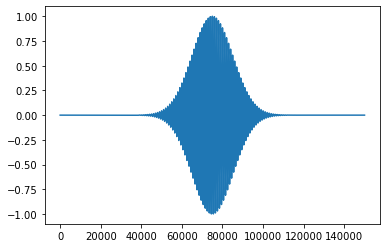

In [126]:
Tot = 1500
dt = 0.01
# Fs = 100
f0 = .1     # The resonant frequency of the circuit

tAxis = np.arange(0, Tot, dt)
sigma = 100
envelope = np.exp( -0.5*((tAxis-Tot/2)/sigma)**2 )
sinWave = np.cos(2*np.pi*f0*tAxis)
packetWave = envelope * sinWave
plt.plot(packetWave)

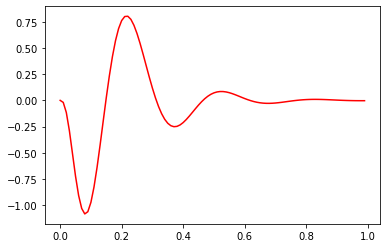

In [127]:
exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210513'
direction = 'UD'
cn = 9

NGD2L1DASpara = np.load(exp_folder + '\\Analyzed_data\\fitNGD2LASpara.npz', allow_pickle=True)
for k in NGD2L1DASpara.files:
    vars()[k] = NGD2L1DASpara[k][()]
    
Ktaxis = np.arange(0, 1., dt)
Kt = NGD2L_TK_AS(Ktaxis, *pd.DataFrame(para_dict).loc[cn-1][:-1])
plt.plot(Ktaxis, Kt, 'r')

(0.0, 10.0)

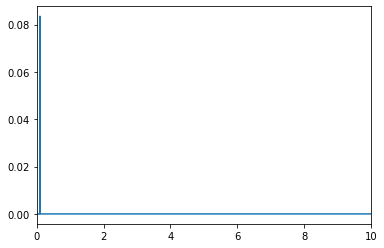

In [128]:
fAxis,FT_packetWave=FFT_quick(packetWave, dt)
plt.plot(fAxis, np.abs(FT_packetWave))
plt.xlim(0,10)

In [159]:
x = packetWave.copy()
x = sinWave.copy()

mag = 30
y = np.convolve(x, Kt, 'full')[:len(x)]*dt*mag


(74000.0, 76000.0)

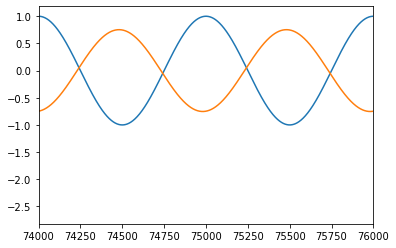

In [161]:
plt.plot(x)
plt.plot(y)
# plt.plot(gain)
# plt.xlim(71000, 79000)
plt.xlim(74000, 76000)

(0.0, 10.0)

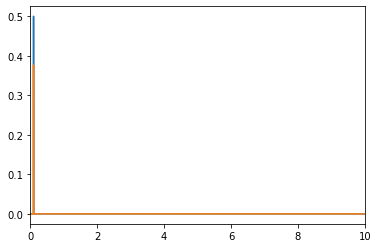

In [162]:
fAxis,FT_x=FFT_quick(x, dt)
fAxis,FT_y=FFT_quick(y, dt)
plt.plot(fAxis, np.abs(FT_x))
plt.plot(fAxis, np.abs(FT_y))
plt.xlim(0,10)

In [163]:
H = FT_y/FT_x
G = np.abs(H)
Phi = np.angle(H)
delta = -angular_gradient(Phi)/np.mean(np.diff(fAxis))
PhaseDelay = -Phi/fAxis

theory_fAxis, theory_H = FFT_quick(mag*Kt, dt)
theory_G = np.abs(theory_H)
theory_Phi = np.angle(theory_H)
theory_delta = -angular_gradient(theory_Phi)/np.mean(np.diff(theory_fAxis))
theory_PhaseDelay = -theory_Phi/theory_fAxis

C:\Users\hydro_leo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Users\hydro_leo\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


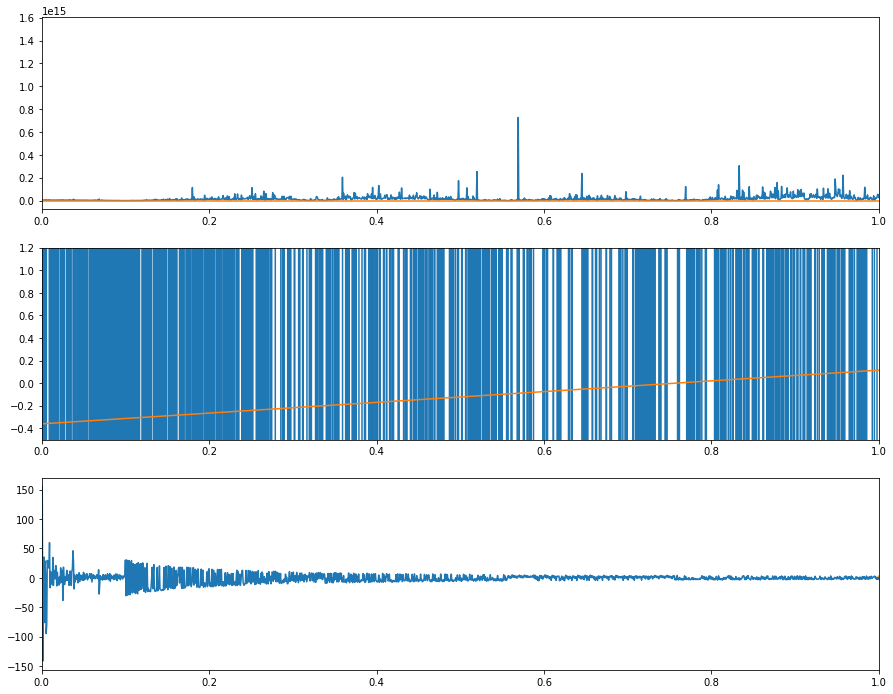

In [166]:
fig, ax = plt.subplots(3,1)
ax[0].plot(fAxis, G)
ax[1].plot(fAxis, delta)
ax[2].plot(fAxis, PhaseDelay)

ax[0].plot(theory_fAxis, theory_G)
ax[1].plot(theory_fAxis, theory_delta)
ax[1].set_ylim(-0.5,1.2)
ax[2].plot(theory_fAxis, theory_PhaseDelay)

for axi in ax:
    axi.set_xlim(0,1)

fig.set_size_inches(15,12)

In [155]:
np.where(fAxis==0.5)

(array([75750], dtype=int64),)

(0.0, 1.0)

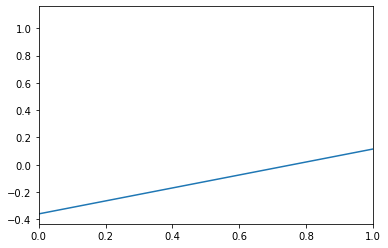

In [156]:
plt.plot(theory_fAxis, theory_delta)
plt.xlim(0,1)